### See the sentiment trend of news articles or titles from January 2018 to May.

sentiment,counts
str,i64
"""negative""",209141
"""positive""",97101


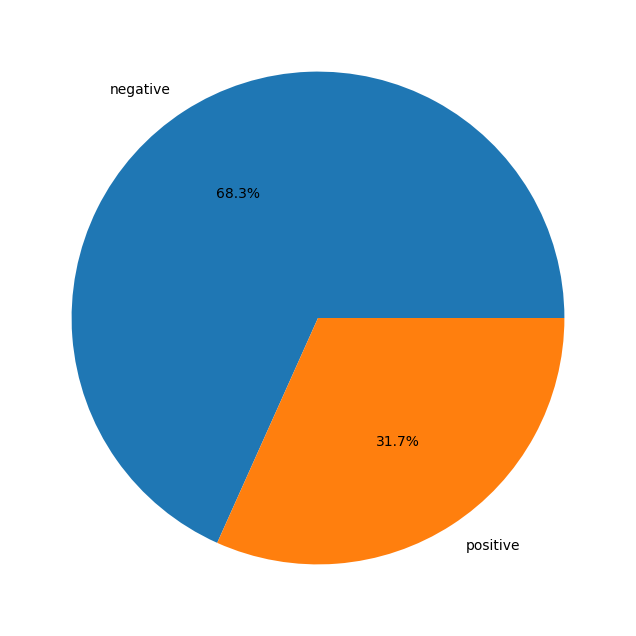

In [5]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('../db/us_financal_news.db')
duckdb_to_arrow = con.query("""select sentiment, COUNT(*) as counts from sentiment group by sentiment;""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

display(polars_df)

# polars_d
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["counts"], labels = polars_df["sentiment"], autopct='%1.1f%%')
plt.show()

con.close()